# Image Upscaler

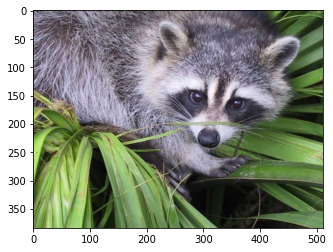

In [1]:
from imageio import imread
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import scipy
import math
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import math
import pdb;

img = Image.open('racoon.jpg')
plt.imshow(img)
plt.show()
racoon = imread('racoon.jpg')
# plt.imshow(racoon); plt.show()

384 512 3


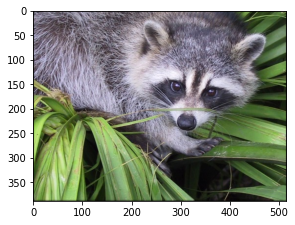

In [114]:
def padImage(image):
    h,w,v = image.shape
    paddedImage = np.zeros((h+4,w+4,v))
    padH, padW, padV = paddedImage.shape
    #top left corner
    paddedImage[0:1,0:1,:] = image[0,0,:]
    #top right corner
    paddedImage[0:1,padW-2:,:] = image[0,w-1,:]
    #bottom left corner
    paddedImage[padH-2:padH-1,0:1,:] = image[h-1,0,:]
    #bottom right corner
    paddedImage[padH-2:padH-1,padW-2:,:] = image[h-1,w-1,:]
    #top row
    paddedImage[0,2:padW-2,:] = image[0,:,:]
    #bottom row
    paddedImage[padH-1,2:padW-2,:] = image[h-1,:,:]
    #left column
    paddedImage[2:padH-2,0,:] = image[:,0,:]
    #right column
    paddedImage[2:padH-2,padW-1,:] = image[:,w-1,:]
    #the rest
    paddedImage[2:padH-2,2:padW-2,:] = image[:,:,:]
    return paddedImage
    
image = np.asarray(img.convert('RGB'))
h,w,v = image.shape
print(h,w,v)
paddedImage = padImage(image)

# toShow = Image.fromarray(paddedImage, 'RGB')
plt.imshow(paddedImage.astype(np.uint8))
plt.show()



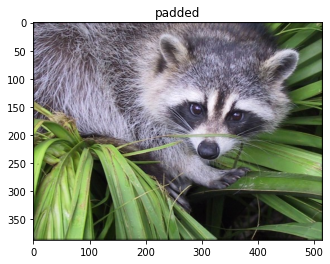

In [3]:
def plotImage(image, title=""):
    im = np.array(image, dtype=np.uint8)
    plt.imshow(im, vmin = 0, vmax = 255)
    plt.title(title)
    plt.show()
plotImage(paddedImage, "padded")

In [4]:
def upscaleImage(paddedImage):
    h,w,v = paddedImage.shape
    toReturn = np.zeros(((h-4)*2,(w-4)*2,v))
    print("paddedImageShape", (h,w,v))
    print("toReturnShape", toReturn.shape)
    for i in range(0,(h-4)*2):
        hIndex = math.floor(i/2.0)+2
        for j in range(0,(w-4)*2):
#             print(i,j)
            wIndex= math.floor(j/2.0)+2
            if (i%2 == 0 and j%2 == 0):
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex-1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1 and j%2 == 1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex+1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex])/4
            elif i%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex+1,wIndex-1,:] + paddedImage[hIndex+1,wIndex,:] + paddedImage[hIndex,wIndex-1,:] + paddedImage[hIndex,wIndex])/4
            elif j%2==1:
                toReturn[i,j,:] = (paddedImage[hIndex-1,wIndex+1,:] + paddedImage[hIndex-1,wIndex,:] + paddedImage[hIndex,wIndex+1,:] + paddedImage[hIndex,wIndex,:])/4
    return toReturn

paddedImageShape (388, 516, 3)
toReturnShape (768, 1024, 3)


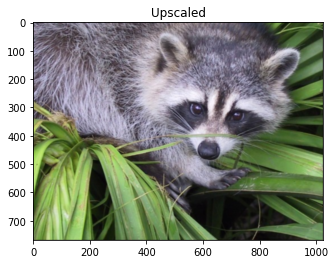

In [5]:
upscaledImage = upscaleImage(paddedImage)
plotImage(upscaledImage, "Upscaled")

Text(0.5, 1.0, 'Anti-aliased = false')

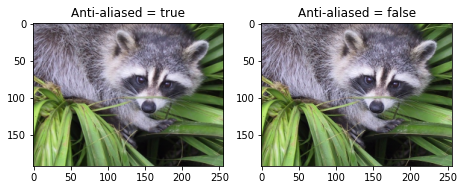

In [95]:
def padEdge(img,amount):
    padded = np.pad(img,((amount,amount),(amount,amount),(0,0)),mode='edge')
    return padded

def downscaleByHalf(img, antiAliasing=False):
    return rescale(image, (0.5, 0.5, 1), anti_aliasing=antiAliasing)

#np.pad(img, ((0,0), (0, width), (0, 0)), mode='reflect'
edgePad = padEdge(image,5)
#plt.imshow(edgePad)
h,w,v = edgePad.shape
antiAliased = downscaleByHalf(image,True)
notAntiAliased = downscaleByHalf(image, False)
fig, axes = plt.subplots(nrows=1, ncols=2)
ax = axes.ravel()
ax[0].imshow(antiAliased)
ax[0].set_title("Anti-aliased = true")

ax[1].imshow(notAntiAliased)
ax[1].set_title("Anti-aliased = false")



In [125]:
staringImage = antiAliased
smallImage = np.array
def getNeighborhoods(image, neighborhoodWidth):
    neighborhoods = []
    neighborhoodWidth = abs(neighborhoodWidth)
    if (neighborhoodWidth%2 == 0):
        neighborhoodWidth = neighborhoodWidth - 1
    offset = math.floor(neighborhoodWidth/2)
    paddedImage = padEdge(image,offset)
#     print('offset', offset)
#     print(paddedImage.shape)
    #for each pixel loops
    for row in range(offset,paddedImage.shape[0]-offset):
        
        for column in range(offset, paddedImage.shape[1]-offset):
            toAdd = []
            #neighborhood loops
            for i in range(-offset,offset+1):
                for j in range(-offset,offset+1):
                    for k in range(0,3):
                        toAdd.append(paddedImage[row+i,column+j,k])
            neighborhoods.append(toAdd)
    return neighborhoods



Text(0.5, 1.0, 'original')

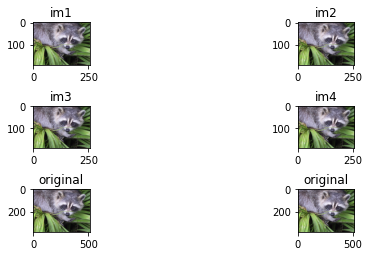

In [126]:
def breakupImage(img):
    im1 = img[0::2,0::2,:] #start 1st row, 1st column
    im2 = img[0::2,1::2,:] #start 1st row, 2nd column
    im3 = img[1::2,0::2,:] #start 2nd row, 1st column
    im4 = img[1::2,1::2,:] #start 2nd row, 2nd column
    return im1,im2,im3,im4


image = np.asarray(img.convert('RGB'))
im1,im2,im3,im4 = breakupImage(image)

plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = False

fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout(h_pad=2)
ax = axes.ravel()
ax[0].imshow(im1)
ax[0].set_title("im1")

ax[1].imshow(im2)
ax[1].set_title("im2")

ax[2].imshow(im3)
ax[2].set_title("im3")

ax[3].imshow(im4)
ax[3].set_title("im4")

ax[4].imshow(image)
ax[4].set_title("original")

ax[5].imshow(image)
ax[5].set_title("original")

In [127]:
#downscale image
#Pad image
#get neighborhood for each pixel
#match up said neighborhood with original image corresponding pixel
#put each neighborhood/pixel pair into a matrix
#set up matrix in the proper way for least squares regression
#run the calculations
#profit

In [131]:
# a = np.array([[[1., 2., 3.],
#         [4., 5., 6.],
#         [7., 8., 9.],
#         [10., 11., 12.],
#         [13., 14., 15.]],

#        [[16, 17., 18],
#         [19., 20, 21],
#         [22, 23, 24],
#         [25, 26, 27],
#         [28, 29, 30]],

#        [[31, 32, 33],
#         [34, 35, 36],
#         [0., 0., 37],
#         [40, 39, 38],
#         [41, 42, 43]],

#        [[44, 45, 46],
#         [47, 48, 49],
#         [50, 51, 52],
#         [53, 54, 55],
#         [56, 57, 58]],

#        [[59, 60, 61],
#         [62, 63, 64],
#         [65, 66, 67],
#         [68, 69, 70],
#         [70, 71, 72]]])

a = [[[1, 1, 0],
  [1, 2, 0],
  [1, 3, 0],
  [1, 4, 0],
  [1, 5, 0]],

 [[2, 1, 0],
  [2, 2, 0],
  [2, 3, 0],
  [2, 4, 0],
  [2, 5, 0]],

 [[3, 1, 0],
  [3, 2, 0],
  [102, 103, 104],
  [3, 4, 0],
  [3, 5, 0]],

 [[4, 1, 0],
  [4, 2, 0],
  [4, 3, 0],
  [4, 4, 0],
  [4, 5, 0]],

 [[5, 1, 0],
  [5, 2, 0],
  [5, 3, 0],
  [5, 4, 0],
  [5, 5, 0]]]
# a = padEdge(a,3)
neighborhood = getNeighborhoods(a,6)
print(len(neighborhood))
# for x in neighborhood:
#     print(x)
# print(kernels)

25


In [132]:
neighborhoods = getNeighborhoods(antiAliased,6)
# print(neighborhoods.shape)
print(len(neighborhoods[0]))
independentVars = np.vstack([neighborhoods])
print(independentVars.shape)

75
(49152, 75)


In [28]:
a= [1,2,2,3]
a = np.vstack([a, np.ones(len(a))]).T
print(a)
b = np.array([3,4,5,6])
# b = [3,4,5,6]
m,x = np.linalg.lstsq(a,b,rcond=None)[0]
print(x,m)

[[1. 1.]
 [2. 1.]
 [2. 1.]
 [3. 1.]]
1.4999999999999967 1.5000000000000007


In [77]:
x = np.array([0, 1, 2, 3])

y = np.array([-1, 0.2, 0.9, 2.1])

A = np.vstack([x, np.ones(len(x))]).T

# A = np.append(A,a,0)

y = np.hstack((y.T,b))

y = np.array([[-1,0.2,0.9,2.1],[3,4,5,6]]).T

print("A=",A)

print("y=",y)

s = np.linalg.lstsq(A, y, rcond=None)

# print(s)
print("\n")
print("All answers=\n",s[0])
print("first answer =",s[0][:,0])
# print(s[1])

A= [[0. 1.]
 [1. 1.]
 [2. 1.]
 [3. 1.]]
y= [[-1.   3. ]
 [ 0.2  4. ]
 [ 0.9  5. ]
 [ 2.1  6. ]]


All answers=
 [[ 1.    1.  ]
 [-0.95  3.  ]]
first answer = [ 1.   -0.95]
